In [169]:
# Name : Milan Girish Chandiramani, 
# CWID : 20032010, 
# Assignment Number and Name : KDD Project C-5.0 Algorithm - Entropy, 

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [98]:
df = pd.read_csv('archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

In [99]:
# Summarizing each column (e.g. min, max, mean ) Summarize each column
summary = df.describe()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

In [170]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling data frame")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
print(df[df.isna().any(axis=1)]) # show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [Diabetes_binary, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
Index: []

[0 rows x 22 columns]
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [101]:
# Create a new column for BMI

# 0 = Underweight (below 18)
# 1 = Healthy (19-24)
# 2 = Overweight (25-29)
# 3 = Obese (30-39)
# 4 = Extremely Obese (40+)

def categorize_bmi(bmi):
    if bmi < 18:
        return 0
    elif 18 <= bmi <= 24:
        return 1
    elif 25 <= bmi <= 29:
        return 2
    elif 30 <= bmi <= 39:
        return 3
    else:
        return 4
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)
df['BMI_Category'] = df['BMI_Category'].astype(float)
print(df[['BMI', 'BMI_Category']].head())
# Replace the BMI column with BMI_Category
df['BMI'] = df['BMI_Category']
df.drop(columns=['BMI_Category'], inplace=True)
print(df.head())

    BMI  BMI_Category
0  26.0           2.0
1  26.0           2.0
2  26.0           2.0
3  28.0           2.0
4  29.0           2.0
   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  2.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  2.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  2.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  2.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  2.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenH

In [102]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [103]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Empty DataFrame


In [104]:
df = pd.get_dummies(df, columns=['GenHlth', 'Age', 'BMI', 'Education', 'Income', ], drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   Stroke                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  AnyHealthcare         70692 non-null  float64
 12  NoDocbcCost           70692 non-null  float64
 13  MentHlth              70692 non-null  float64
 14  PhysHlth              70692 non-null  float64
 15  DiffWalk           

In [105]:
attr = df.drop('Diabetes_binary', axis=1)
target = df['Diabetes_binary']


# from sklearn.preprocessing import MinMaxScaler
# # Initialize MinMaxScaler
# scaler = MinMaxScaler()
# # Fit and transform the data
# attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
# attr.head()


# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

In [106]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [154]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
accuracy_original = accuracy_score(target_test,target_pred )
print(f'Accuracy of model {accuracy_original}')

Accuracy of model 0.739060731799321


In [159]:
target.unique()

array([0., 1.])

In [155]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[7325 3284]
 [2250 8349]]
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     10609
         1.0       0.72      0.79      0.75     10599

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [160]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,max_depth = 3, fontsize=20,filled=True,feature_names=attr.columns, class_names=['No Diabetes', 'Diabetes']);

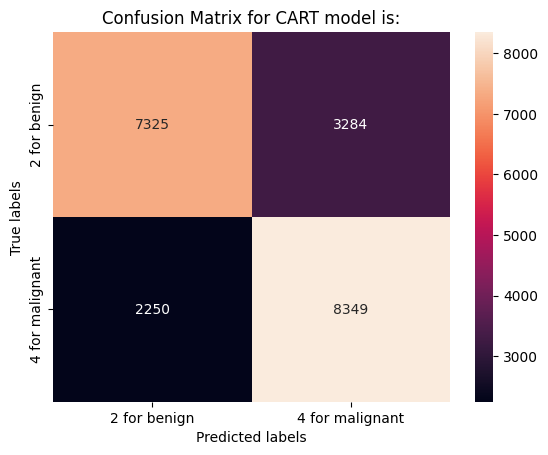

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot(cm):
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f"Confusion Matrix for CART model is:"); 
    ax.xaxis.set_ticklabels(['2 for benign', '4 for malignant'])
    ax.yaxis.set_ticklabels(['2 for benign', '4 for malignant'])
    plt.show()

plot(confusion_matrix(target_test, target_pred))

## Consider the accuracy over a range of random states

In [111]:
import csv
# attr = df_num[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']]
# target = df_num['Diabetes_binary']
attr = df.drop('Diabetes_binary', axis=1)
target = df['Diabetes_binary']

# from sklearn.preprocessing import MinMaxScaler
# # Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()
accuracies = []
best_random_state = 0
best_accuracy = 0
random_states = range(102)
# Open a CSV file to save the accuracies
with open('cart_accuracies.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["RandomState", "Accuracy"])
    for random_state in random_states:
        # Split the data into training and testing sets
        attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=random_state)
        model = DecisionTreeClassifier(criterion='entropy', max_depth=9)
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)
        # Evaluate performance
        accuracy = accuracy_score(target_test, target_pred)
        print(f"RandomState {random_state}: Accuracy = {accuracy * 100:.2f}%")
        if accuracy > best_accuracy:
            best_random_state = random_state
            best_accuracy = accuracy
        # Save the result to the CSV file
        writer.writerow([random_state, accuracy])
        # Append the accuracy to the list for future analysis (if needed)
        accuracies.append((random_state, accuracy, confusion_matrix(target_test,target_pred), classification_report(target_test,target_pred)))

RandomState 0: Accuracy = 73.50%
RandomState 1: Accuracy = 73.64%
RandomState 2: Accuracy = 73.41%
RandomState 3: Accuracy = 73.53%
RandomState 4: Accuracy = 73.18%
RandomState 5: Accuracy = 73.21%
RandomState 6: Accuracy = 73.75%
RandomState 7: Accuracy = 73.48%
RandomState 8: Accuracy = 73.60%
RandomState 9: Accuracy = 72.88%
RandomState 10: Accuracy = 73.07%
RandomState 11: Accuracy = 73.82%
RandomState 12: Accuracy = 73.88%
RandomState 13: Accuracy = 73.54%
RandomState 14: Accuracy = 73.82%
RandomState 15: Accuracy = 73.28%
RandomState 16: Accuracy = 73.64%
RandomState 17: Accuracy = 73.32%
RandomState 18: Accuracy = 73.27%
RandomState 19: Accuracy = 73.18%
RandomState 20: Accuracy = 73.30%
RandomState 21: Accuracy = 73.78%
RandomState 22: Accuracy = 73.62%
RandomState 23: Accuracy = 73.09%
RandomState 24: Accuracy = 73.73%
RandomState 25: Accuracy = 72.90%
RandomState 26: Accuracy = 73.26%
RandomState 27: Accuracy = 73.50%
RandomState 28: Accuracy = 73.32%
RandomState 29: Accuracy

In [112]:
print(best_random_state, best_accuracy)

35 0.7395794039984911


## Consider the 15 best attributes

In [122]:
import csv
attr = df[['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 
    'GenHlth_1.0', 'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0',
    'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0',
    'BMI_0.0', 'BMI_1.0', 'BMI_2.0', 'BMI_3.0', 'BMI_4.0',   
    'Education_1.0', 'Education_2.0', 'Education_3.0', 'Education_4.0', 'Education_5.0', 'Education_6.0',  
    'Income_1.0', 'Income_2.0', 'Income_3.0' , 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0' , 'Income_8.0' ]]
target = df['Diabetes_binary']

# from sklearn.preprocessing import MinMaxScaler
# # Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()
accuracies = []
best_random_state = 0
best_accuracy = 0
random_states = range(102)
# Open a CSV file to save the accuracies
with open('cart_accuracies.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["RandomState", "Accuracy"])
    for random_state in random_states:
        # Split the data into training and testing sets
        attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=random_state)
        model = DecisionTreeClassifier(criterion='entropy', max_depth=9)
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)
        # Evaluate performance
        accuracy = accuracy_score(target_test, target_pred)
        print(f"RandomState {random_state}: Accuracy = {accuracy * 100:.2f}%")
        if accuracy > best_accuracy:
            best_random_state = random_state
            best_accuracy = accuracy
        # Save the result to the CSV file
        writer.writerow([random_state, accuracy])
        # Append the accuracy to the list for future analysis (if needed)
        accuracies.append((random_state, accuracy, confusion_matrix(target_test,target_pred), classification_report(target_test,target_pred)))

RandomState 0: Accuracy = 73.69%
RandomState 1: Accuracy = 73.29%
RandomState 2: Accuracy = 73.42%
RandomState 3: Accuracy = 73.60%
RandomState 4: Accuracy = 73.04%
RandomState 5: Accuracy = 73.38%
RandomState 6: Accuracy = 73.55%
RandomState 7: Accuracy = 73.48%
RandomState 8: Accuracy = 73.68%
RandomState 9: Accuracy = 72.79%
RandomState 10: Accuracy = 72.97%
RandomState 11: Accuracy = 73.69%
RandomState 12: Accuracy = 73.60%
RandomState 13: Accuracy = 73.64%
RandomState 14: Accuracy = 73.71%
RandomState 15: Accuracy = 73.34%
RandomState 16: Accuracy = 73.67%
RandomState 17: Accuracy = 73.15%
RandomState 18: Accuracy = 73.25%
RandomState 19: Accuracy = 73.13%
RandomState 20: Accuracy = 73.32%
RandomState 21: Accuracy = 73.59%
RandomState 22: Accuracy = 73.56%
RandomState 23: Accuracy = 73.18%
RandomState 24: Accuracy = 73.46%
RandomState 25: Accuracy = 73.00%
RandomState 26: Accuracy = 73.17%
RandomState 27: Accuracy = 73.11%
RandomState 28: Accuracy = 73.30%
RandomState 29: Accuracy

In [123]:
print(best_random_state, best_accuracy)

35 0.7392493398717465


In [162]:
from sklearn.preprocessing import StandardScaler

# Define features and target
# Select most important features to see if accuracy improves
attr_important = df[['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 
    'GenHlth_1.0', 'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0',
    'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0',
    'BMI_0.0', 'BMI_1.0', 'BMI_2.0', 'BMI_3.0', 'BMI_4.0',   
    'Education_1.0', 'Education_2.0', 'Education_3.0', 'Education_4.0', 'Education_5.0', 'Education_6.0',  
    'Income_1.0', 'Income_2.0', 'Income_3.0' , 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0' , 'Income_8.0' ]]
#df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']]

# Split the data into training and testing sets
# scaler = StandardScaler()
# attr_scaled = scaler.fit_transform(attr_important)
attr_train, attr_test, target_train, target_test = train_test_split(attr_important, target, test_size=0.3, random_state=35)

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
accuracy_new = accuracy_score(target_test,target_pred )
print(f'Previous Accuracy of model {accuracy_original}%')
print(f'Best Accuracy of model {accuracy_new}%')
print('')

Previous Accuracy of model 0.739060731799321%
Best Accuracy of model 0.7392493398717465%



In [163]:
df['HighBP'].describe()

count    70692.000000
mean         0.563458
std          0.495960
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HighBP, dtype: float64

In [164]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[7322 3287]
 [2243 8356]]
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     10609
         1.0       0.72      0.79      0.75     10599

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [172]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(target_test,target_pred)
precision = precision_score(target_test,target_pred)
recall = recall_score(target_test,target_pred)
f1 = f1_score(target_test,target_pred) 
print(accuracy, precision, recall, f1)

0.7392493398717465 0.7176844455896246 0.7883762619115011 0.7513712795611905


In [165]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, max_depth = 3, fontsize=27,filled=True,feature_names=attr.columns, class_names=['No Diabetes', 'Diabetes']);

Author:Milan Chandiramani


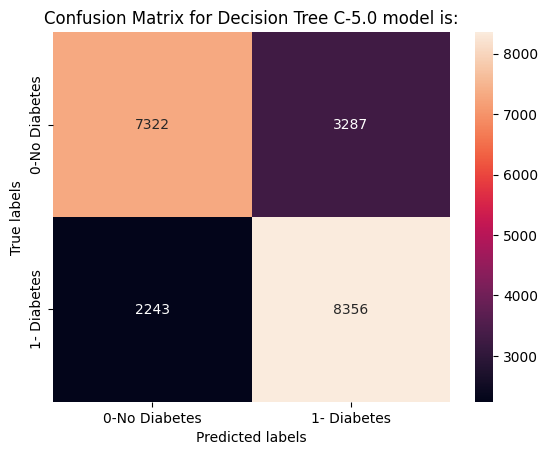

In [168]:
def plot(cm):
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f"Confusion Matrix for Decision Tree C-5.0 model is:"); 
    ax.xaxis.set_ticklabels(['0-No Diabetes', '1- Diabetes'])
    ax.yaxis.set_ticklabels(['0-No Diabetes', '1- Diabetes'])
    plt.show()
print("Author:Milan Chandiramani")
plot(confusion_matrix(target_test, target_pred))

In [ ]:
# -------------------------------------- END ---------------------------------------